#Project Introduction

###Science Question: 
Is it possible to predict the strength of concrete based on its parameters?

###Problem:
Concrete's strength is a critical factor in determining its 
performance. Current tests that are used as industry standards are expensive, destructive and time consuming. There is an urgent need for a technique to predict strength non-destructively which could be cheaper and faster. 

###Hypothesis:
Based on limited data of concrete parameters obtained from in-site testing techniques it is possible to train AI models like Regressive Neural network, linear regression to predict strength. It is believed in this project that efficient AI models can be trained which would in turn replace conventional techniques for strength prediction like compressive strength test from ASTM codes.




##Dataset:

 https://drive.google.com/file/d/1LXqGlnk63mDnrsXuk_OIAZYNidG2fLPf/view?usp=sharing

### Publicly available dataset

Dataset Source: The dataset is from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength


Acknowledgements
Original Owner and Donor

Prof. I-Cheng Yeh

Department of Information Management

Chung-Hua University

Citation Request:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
df = pd.read_csv('drive/MyDrive/Colab Notebooks/concrete_data.csv')

print(df.head())

print(df.describe)

df_summary = df.describe

features = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']

target = ['Strength']

n_cols = 8 #number of predictors for Neural network

   Cement  Blast Furnace Slag  Fly Ash  ...  Fine Aggregate  Age  Strength
0   540.0                 0.0      0.0  ...           676.0   28     79.99
1   540.0                 0.0      0.0  ...           676.0   28     61.89
2   332.5               142.5      0.0  ...           594.0  270     40.27
3   332.5               142.5      0.0  ...           594.0  365     41.05
4   198.6               132.4      0.0  ...           825.5  360     44.30

[5 rows x 9 columns]
<bound method NDFrame.describe of       Cement  Blast Furnace Slag  Fly Ash  ...  Fine Aggregate  Age  Strength
0      540.0                 0.0      0.0  ...           676.0   28     79.99
1      540.0                 0.0      0.0  ...           676.0   28     61.89
2      332.5               142.5      0.0  ...           594.0  270     40.27
3      332.5               142.5      0.0  ...           594.0  365     41.05
4      198.6               132.4      0.0  ...           825.5  360     44.30
...      ...              

There are a total of 1030 data instances (rows)

##Dataset description:

The feature set includes:

1.   Cement
2.   Blast Furnace Slag
3.   Fly Ash
4.   Water
5.   Super-plasticizer
6.   Coarse Aggregate
7.   Fine Aggregate
8.   Age
  


The target set is:

Strength of the Cement



Science Question: Is it possible to predict the strength of concrete based on its parameters?

# Data Acquisition, Selection, Cleaning
Introduce the data here as well as any technical overview that's important that wasn't given in the introduction


### Check for outliers

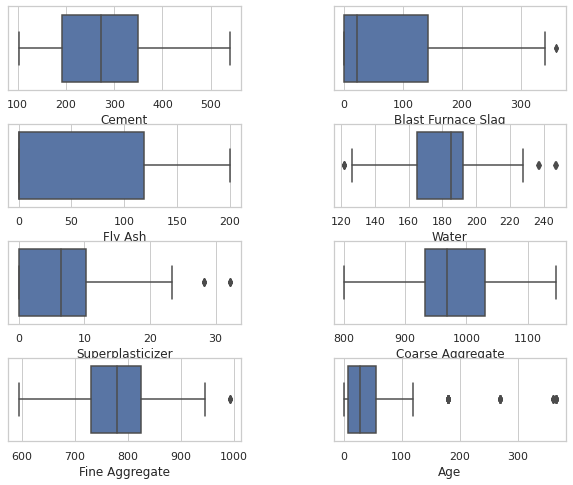

In [ ]:
plt.figure(figsize =(10,8))
n = 0
sns.set(style="whitegrid")
for i in features:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = df[i])
plt.show()

There are a few outliers in slag, water, superplasticizer, fine_agg and age.

Removing the rows with outliers removes around 10% of the data so we will substitute them with the mean values.

In [ ]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


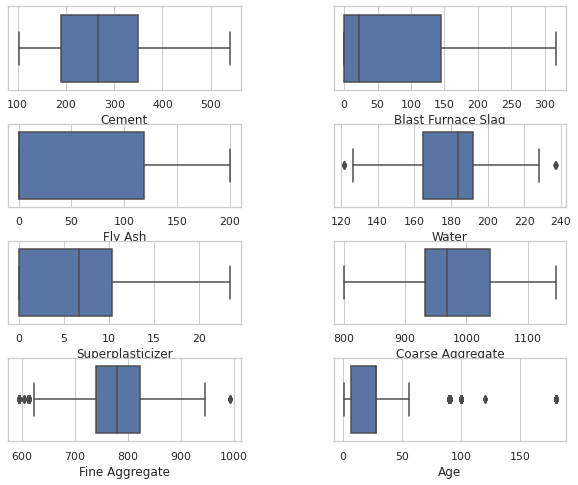

In [ ]:
plt.figure(figsize =(10,8))
n = 0
sns.set(style="whitegrid")
for i in features:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = df[i])
plt.show()

### Check for empty cells within the dataset 

In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### We can see that there is no empty cells within the data 

In [ ]:
corrMatrix = df[df.columns[0:]].corr()['Strength'][:-1]
corrMatrix = corrMatrix.to_frame()

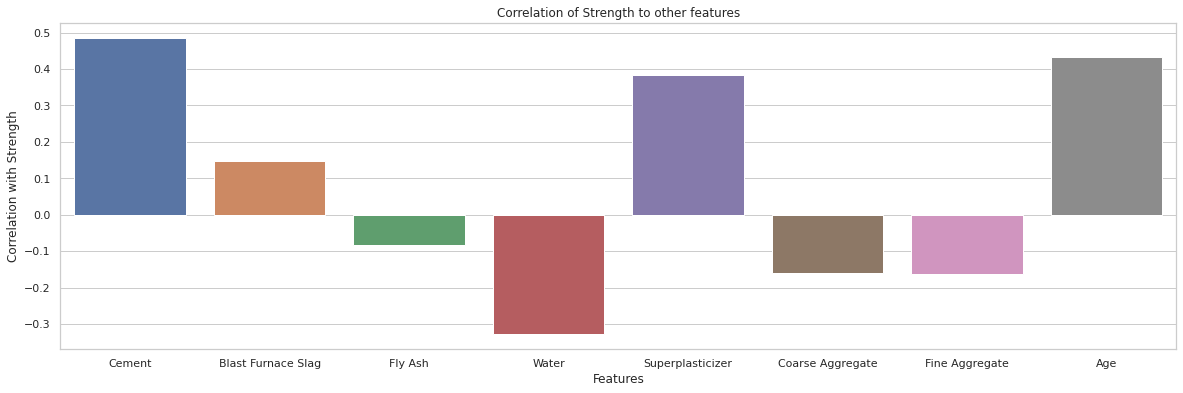

,Strength
Cement,0.485174
Blast Furnace Slag,0.149047
Fly Ash,-0.081538
Water,-0.327835
Superplasticizer,0.384011
Coarse Aggregate,-0.158351
Fine Aggregate,-0.162665
Age,0.432874


In [ ]:
plt.figure(1,figsize =(20,6))
sns.set(style="whitegrid")
sns.barplot(x = corrMatrix.index,y = corrMatrix['Strength'],data = corrMatrix)
plt.title('Correlation of Strength to other features')
plt.ylabel('Correlation with Strength')
plt.xlabel('Features')
plt.show()
corrMatrix

From the bar chart we can infer that:

Cement Superplasticizer Age are parameteres that have a positive effect on the Concrete's Strength, while, Water has a large negative impact in comparison to other detrimental factors

<Figure size 576x576 with 0 Axes>

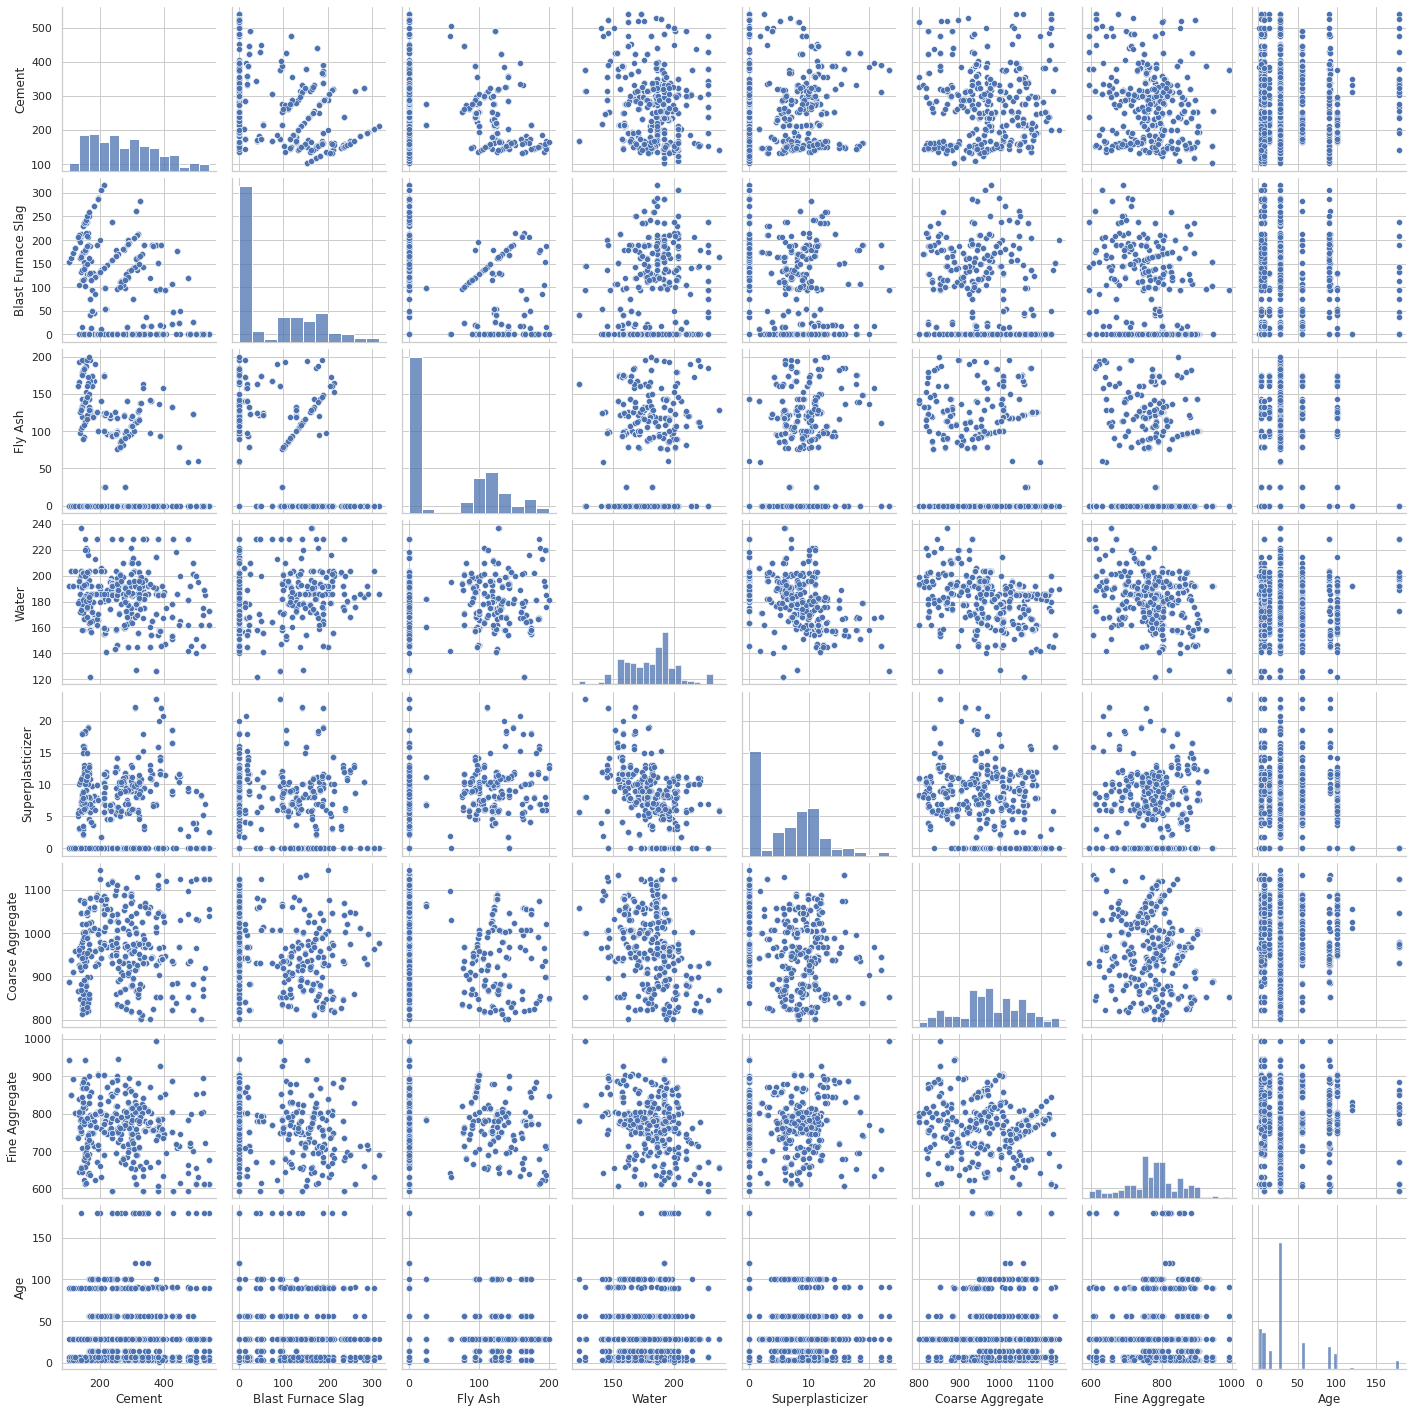

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

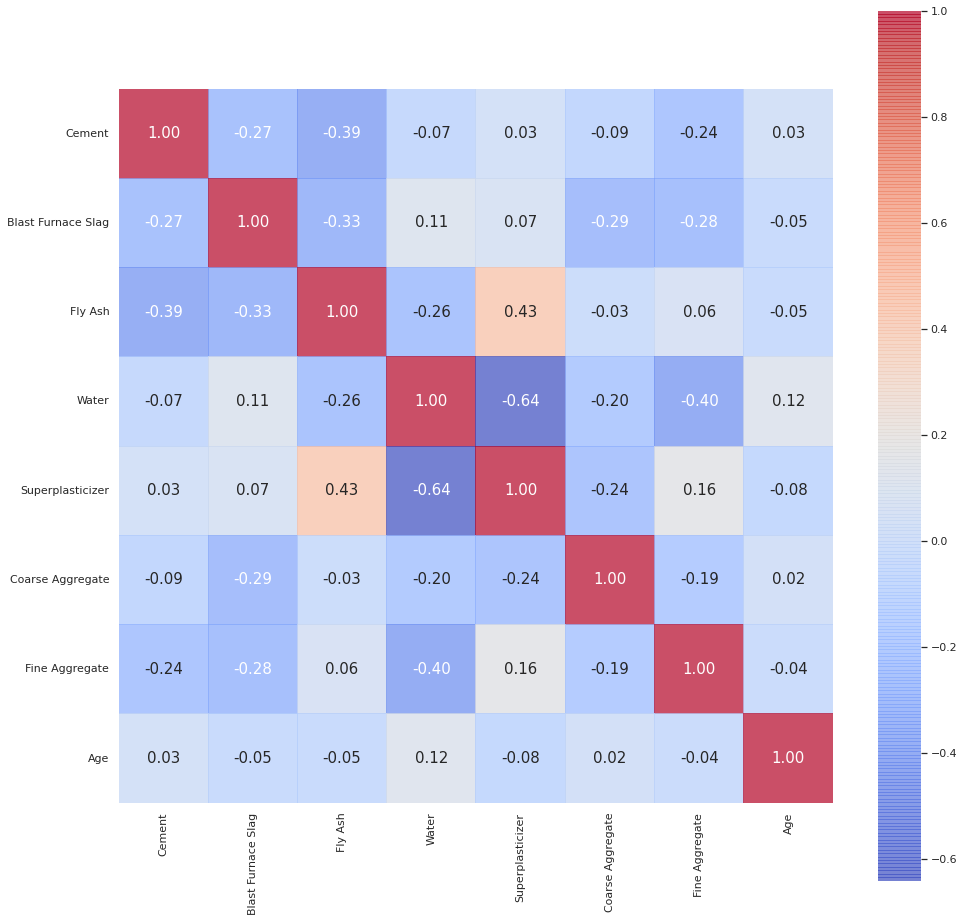

In [ ]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

The pair wise plot and the correlation matrix do suggest that there are  no two features that have a very strong correlation


In [ ]:
print(df.head())
 

   Cement  Blast Furnace Slag  Fly Ash  ...  Fine Aggregate  Age  Strength
0   540.0                 0.0      0.0  ...           676.0   28     79.99
1   540.0                 0.0      0.0  ...           676.0   28     61.89
5   266.0               114.0      0.0  ...           670.0   90     47.03
7   380.0                95.0      0.0  ...           594.0   28     36.45
8   266.0               114.0      0.0  ...           670.0   28     45.85

[5 rows x 9 columns]


### The heatmap obtained from the correlation matrix shows that there is no strong correlation between features so we will apply linear regrression model to predict strength. Also non-linear nature of data suggests that a non-linear model like neural networks that use data mapping & back-propogation can lead to a more accurate model

### The scale of individual features are very different so the data neeeds to be normalized before application for a suitable model for training

In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,target].values
# Standardizing the features
X = scaler.fit_transform(X)

# Data Analysis

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 7)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(784, 8) (197, 8) (784, 1) (197, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
y_pred = lr.predict(X_test)
mean_squared_error(y_test,y_pred)

95.2327270540959

In [ ]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
MSE = []

for i in range(60):

    # build the model
    model = regression_model()

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))

In [ ]:
print('number of iterations: {:.2f}'.format(len(MSE)))
MSE

number of iterations: 60.00


[118.57279209711888,
 119.68865986429444,
 115.67583656305965,
 114.94404414299362,
 82.61115390529163,
 120.05736933052967,
 95.55507992262932,
 85.3355673914203,
 120.91772392273641,
 90.39744882171233,
 119.88235630415328,
 119.26925289520634,
 112.82076314288359,
 103.74417414995283,
 119.7942271611073,
 115.38353709161211,
 112.40625075859691,
 97.91843232294886,
 85.28132161967774,
 120.71739321047417,
 98.05305297958513,
 114.69480746477451,
 120.21702325356307,
 106.86103234638186,
 118.33818094856295,
 91.5270730238403,
 118.96673410030242,
 119.16666384315118,
 82.80706379342838,
 121.83930029546919,
 123.34359448133903,
 121.98763621614478,
 101.23488335846879,
 122.02465184952779,
 120.59392666460967,
 110.02196126262358,
 115.50389624286636,
 114.39967204726422,
 126.01587806346647,
 119.39122462347498,
 114.49090175318577,
 106.73928142529647,
 73.93604172586898,
 117.04047880111843,
 119.3965205735108,
 117.19208123138081,
 123.73824533041244,
 110.86775457677724,
 107.9

In [ ]:
print('mse_Mean: {:.2f}'.format(np.mean(MSE)))

mse_Mean: 111.23


In [ ]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
MSE = []

for i in range(60):

    # build the model
    model = regression_model()

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))

In [ ]:
print('number of iterations: {:.2f}'.format(len(MSE)))
MSE

number of iterations: 60.00


[90.3442180229477,
 73.92153597836068,
 82.03950326298308,
 114.42085253598947,
 91.05829770355385,
 107.96787258576808,
 109.96622838498618,
 114.93047144462051,
 115.0586019294181,
 96.53045493396478,
 116.58195317582482,
 106.46887847368069,
 119.4169192426052,
 74.71158463840061,
 71.08926632496001,
 51.38922724815126,
 97.11832028596832,
 78.0204492003313,
 102.99854006469418,
 87.28487704006632,
 109.6798171923395,
 108.19342883899763,
 96.31111660186224,
 109.69304323416316,
 88.53770768664982,
 103.07174490504214,
 71.79984566988267,
 88.6770944017572,
 58.06629592474818,
 96.57607435379335,
 103.17827965478807,
 95.68165802099796,
 97.04250830641493,
 99.44134864281297,
 111.3967319435625,
 58.838622373981146,
 102.27363806111595,
 81.85694448384372,
 77.02869132930641,
 106.19252424700625,
 91.05418562060485,
 98.80648573701708,
 113.61506613212424,
 98.47765448420645,
 73.62289828999508,
 94.96529216431361,
 86.75653118050467,
 75.88716836444807,
 112.8162866584372,
 89.0712

In [ ]:
print('mse_Mean: {:.2f}'.format(np.mean(MSE)))

mse_Mean: 94.18


# Summary

-Neural Networks prove to be a better model in terms of Mean Sqaure accuracy.

-We infer that increasing the number of hidden layers imporves the neural network model a lot more than increasing the number of epochs. 